In [20]:
#keeps the information about the experiment

import math

class data:
    
    const = 10000
    
    t = 0
    
    flux_real = 723
    flux_min = 0
    flux_max = 1000
    flux_step = 0.01
    
    repeat = 5
    
    t_min = (math.pi / 2) / (const * (flux_max + flux_min) / 2)
    t_max = (math.pi / 2) / (const * (flux_max + flux_min) / 2) * 1024
    
    n = round((flux_max - flux_min) / flux_step) + 1
    
    def __init__(self):
        data.t = data.t_min
                 
    def time_step(self):
        data.t *= 2

In [21]:
#returns the state 

import numpy as np

np.random.seed(47)

def randbin(data, f):
    phi = data.const * f * data.t
    p_0 = (np.sin(phi / 2)) ** 2
    return np.random.choice([0,1], size=(1,1), p=[p_0, 1-p_0]).reshape(1)[0]

In [22]:
#returns the probability of the given state depending on the given flux 

import numpy as np

def pstate(data, x, f):
    if x == 0:
        return (np.sin(data.const * f * data.t / 2)) ** 2
    else:
        return (np.cos(data.const * f * data.t / 2)) ** 2

In [23]:
#the bayes theorem

def bayes(data, pres):
    
    h = randbin(data, data.flux_real)
    
    #h = round(sum([1 , 0 , 1....])/data.repeat)
    normalization = 0

    for i in range(len(pres)):
        pres[i] = pres[i] * pstate(data, h, data.flux_min + i * data.flux_step)
        normalization += pres[i]
    
    for i in range(len(pres)):
        pres[i] /= normalization

In [24]:
#fills arrays with a uniform distribution

def begin(data, array1, array2, array3):
    
    for i in range(data.n):
        array1.append(1 / data.n)
        array2.append(1 / data.n)
        array3.append(data.flux_min + i * data.flux_step)

In [25]:
#draws the function

import matplotlib.pyplot as plt
import numpy as np

def draw_distr(data, array1, array2):
    
    plt.rcParams['figure.figsize'] = [10, 10]
    
    x = []
    for i in range(data.n):
        x.append(data.flux_min + i * data.flux_step)
    
    plt.plot(x, array1, 'o', color = 'b', label = 'final step')
    plt.plot(x, array2, 'o', color = 'r', label = 'initial')
    
    plt.title('distribution', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    
    plt.show()

def draw_scale(dflux, dtime):
    
    heiz = np.array([])
    shot = np.array([])
    
    dflux = np.array(dflux)
    dtime = np.array(dtime)
    
    for i in range(len(dtime)):
        heiz = np.append(heiz, np.log2(1 / dtime[i]))
        shot = np.append(shot, np.log2(1 / np.sqrt(dtime[i])))     
    
    for i in range(len(dtime)):
        dflux[i] = np.log2(dflux[i])
        dtime[i] = np.log2(dtime[i])
    
    plt.rcParams['figure.figsize'] = [10,10]
    
    A3 = np.vstack([dtime, np.ones(len(dtime))]).T
    m3, c3 = np.linalg.lstsq(A3, dflux, rcond=None)[0]
    plt.plot(dtime, dflux, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m3*dtime + c3, 'c', label = 'experiment')
    
    A1 = np.vstack([dtime, np.ones(len(dtime))]).T
    m1, c1 = np.linalg.lstsq(A1, heiz, rcond=None)[0]
    plt.plot(dtime, heiz, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m1*dtime + c3, 'g', label='heizenberg')
    
    A2 = np.vstack([dtime, np.ones(len(shot))]).T
    m2, c2 = np.linalg.lstsq(A2, shot, rcond=None)[0]
    plt.plot(dtime, shot, 'o', color = 'k', markersize = 5)
    plt.plot(dtime, m2*dtime + c3, 'g', label = 'shot noise')
    
    plt.title('scaling', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    
    print('slope:', m3,'intercept:', c3)
    
    plt.show()

In [26]:
#calculates the average 

def avg(x, y):
    
    avg = 0
    normalization = 0
    
    for i in range(len(x)):
        avg += x[i] * y[i]
        normalization += x[i]
        
    return avg / normalization #average x

In [27]:
#calculates the error

import numpy as np

def sigma(probs, fluxes):
    
    number = 1 / np.sqrt(2)
    
    pike_x = avg(probs, fluxes) 
    pike_y = 0
    
    for i in range(len(probs)):
        if probs[i] > pike_y:
            pike_y = probs[i]
    
    flux_step = fluxes[1] - fluxes[0]
    
    count = 0
    
    for i in range(len(probs)):
        if probs[i] > number * pike_y:
            count = count + 1
        
    return count * flux_step / 2

In [28]:
#test

def test(data, err, fluxes, probs):
        
    if (8 * err / data.flux_step <= 10):
        fluxes.insert()

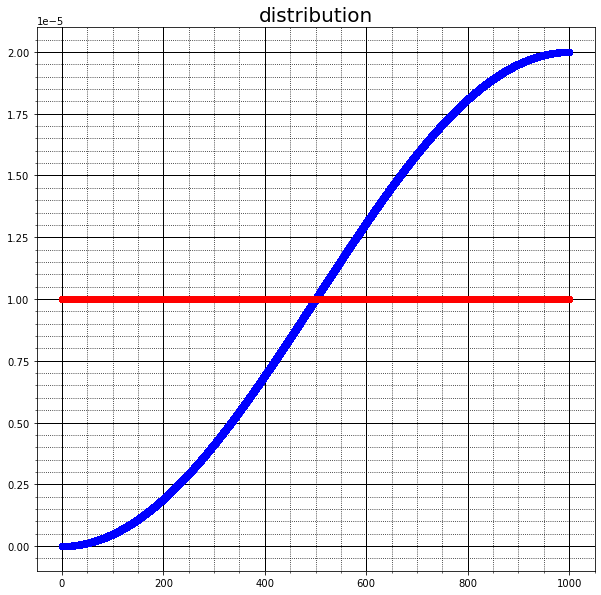

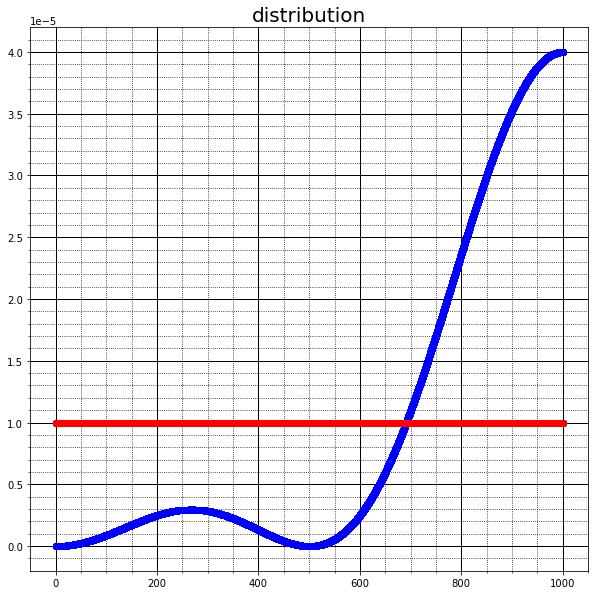

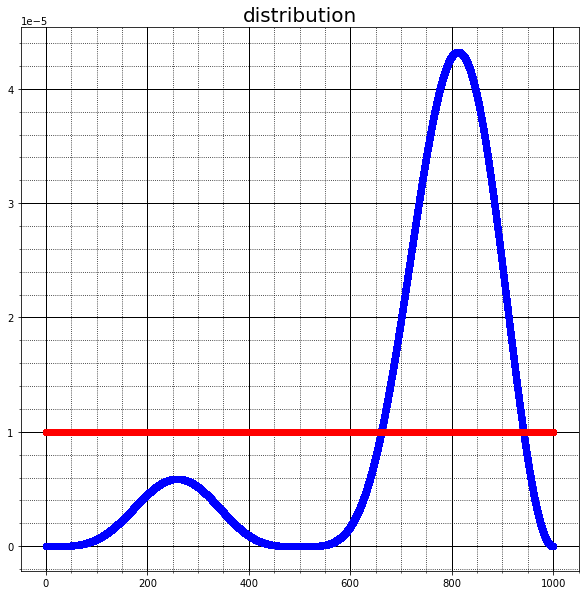

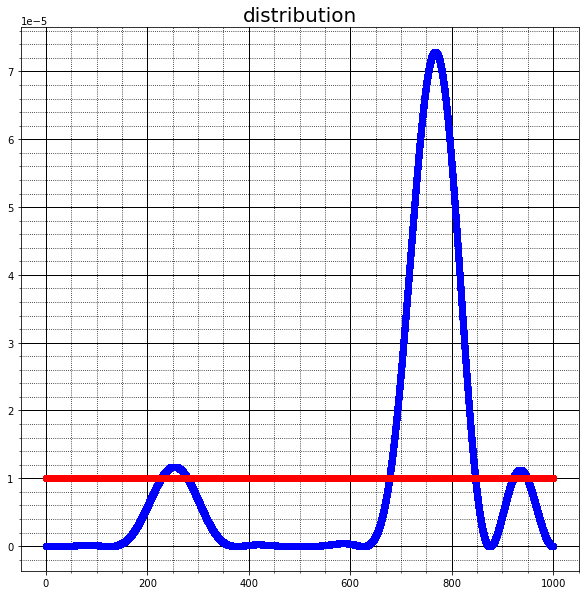

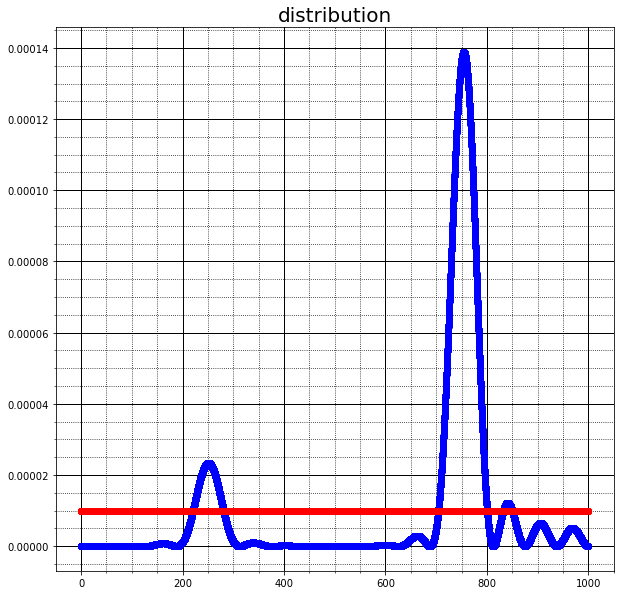

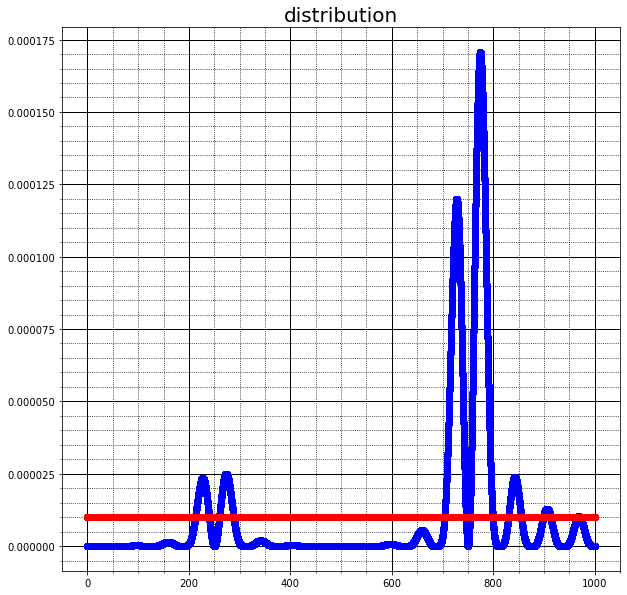

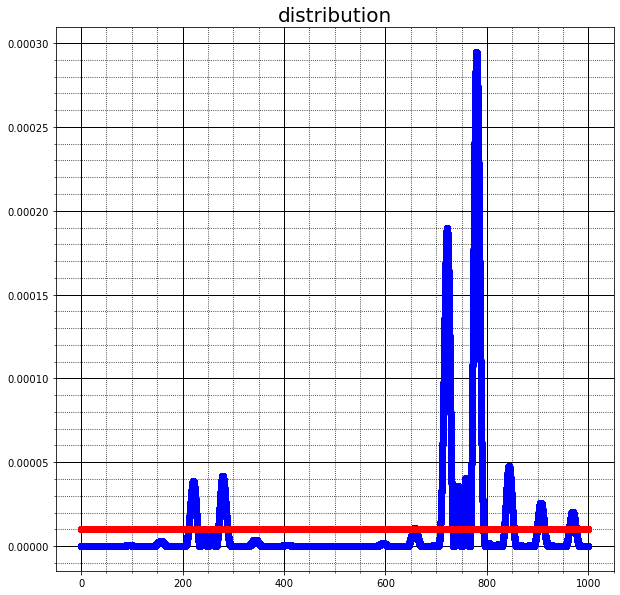

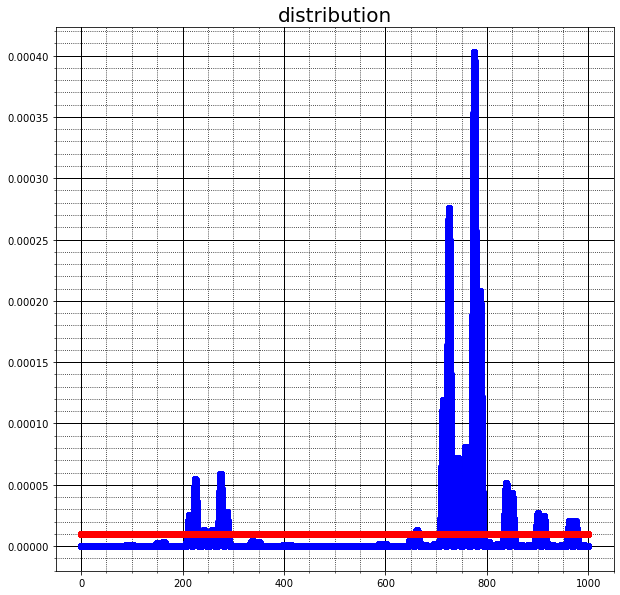

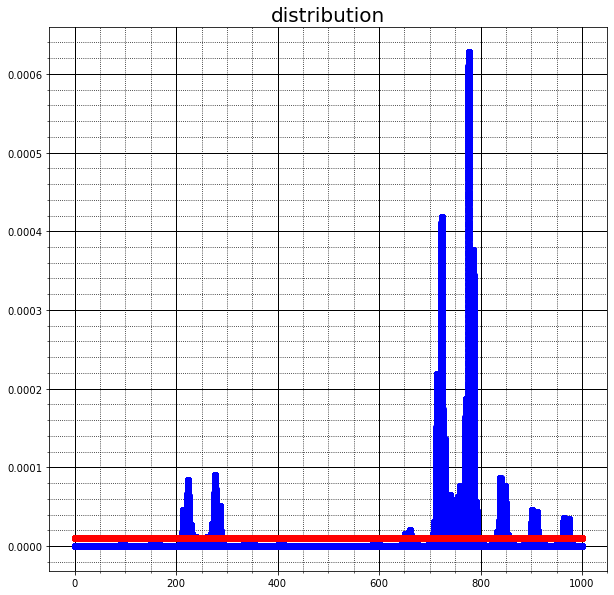

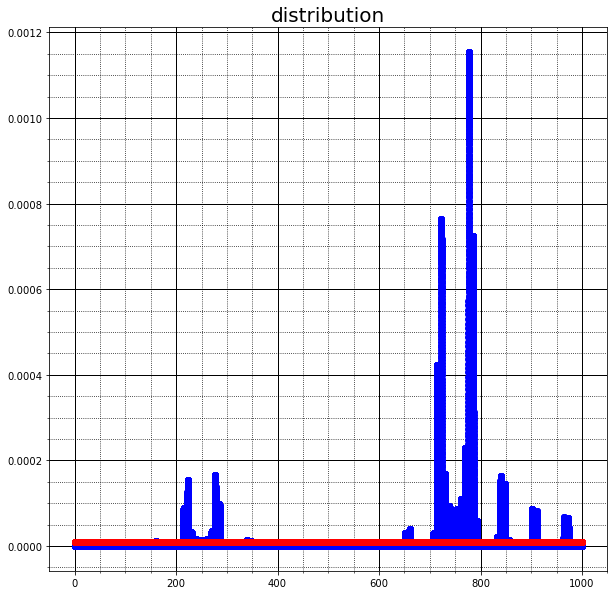

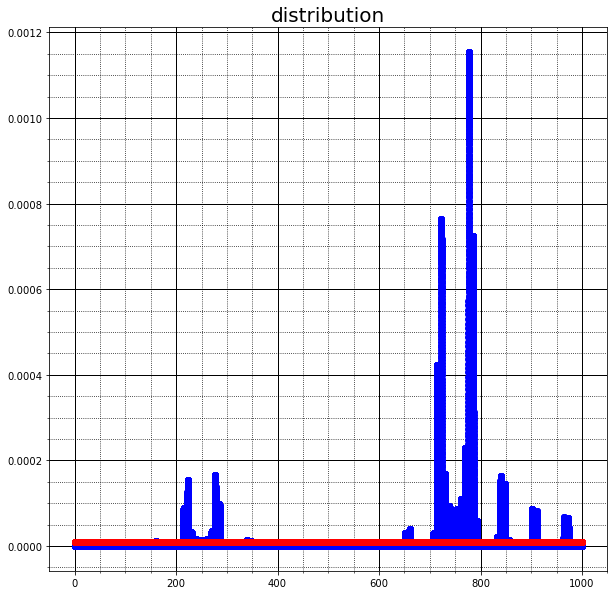

calculated flux is 704.6983897813897 +- 0.605 ( 0.08585233183059805 %)
and the real flux was 723 . mistake: 2.531343045450946 %
slope: -1.1553809387957767 intercept: -9.830995566277142


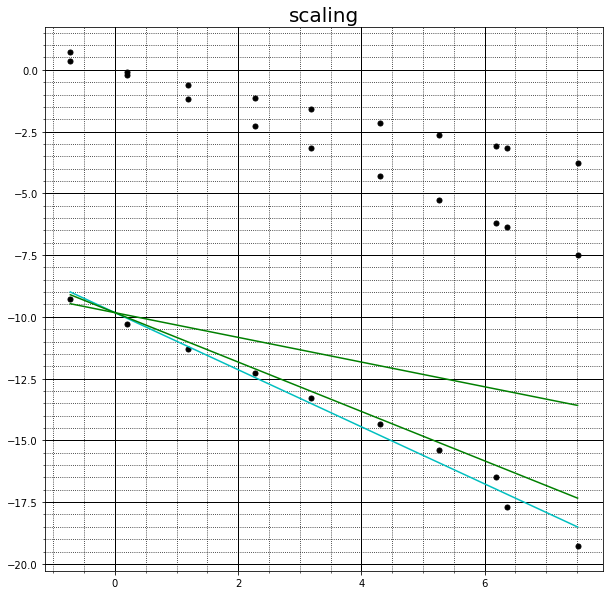

In [29]:
#main

import numpy as np

experiment = data()

present = []
initial = []
interval = []

delta_flux = []
delta_t = []

begin(experiment, present, initial, interval)

for i in range(int(np.log2(experiment.t_max/ experiment.t_min))):
    
    err = 0   
    
    bayes(experiment, present)
    err = sigma(present, interval)
        
    draw_distr(experiment, present, initial)
        
    delta_flux.append(err)
    
    if i == 0:
        delta_t.append(experiment.t * experiment.repeat)
    else:
        delta_t.append(experiment.t * experiment.repeat + delta_t[i-1])
    
    experiment.time_step()

draw_distr(experiment, present, initial)
    
calculated = avg(present, interval)

print('calculated flux is', calculated, '+-', err, '(', err / calculated * 100, '%)')

print('and the real flux was', experiment.flux_real, '. mistake:',
      abs(calculated - experiment.flux_real) / experiment.flux_real * 100, '%')

#draw_distr(experiment, present, initial)
    
draw_scale(delta_t, delta_flux)